<a href="https://colab.research.google.com/github/Dion05-sfi/perpustakaan-sqlite/blob/main/perpustakaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistem Basis Data Perpustakaan - SQLite & Pandas
Nama : Dion Alif
Nim : 411222040

In [1]:
import sqlite3
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

In [2]:
cursor.execute("""
CREATE TABLE buku (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    judul TEXT,
    penulis TEXT,
    tahun INTEGER
);
""")

In [3]:
cursor.execute("""
CREATE TABLE anggota (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nama TEXT,
    email TEXT
);
""")

In [4]:
cursor.execute("""
CREATE TABLE peminjaman (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    id_anggota INTEGER,
    id_buku INTEGER,
    tgl_pinjam TEXT,
    tgl_kembali TEXT,
    FOREIGN KEY (id_anggota) REFERENCES anggota(id),
    FOREIGN KEY (id_buku) REFERENCES buku(id)
);
""")

In [6]:
buku_data = [
    ("Pemrograman Python", "Andi Setiawan", 2020),
    ("Basis Data Lanjut", "Siti Aminah", 2019),
    ("Algoritma & Struktur Data", "Budi Santoso", 2021),
    ("Jaringan Komputer", "Rina Wulandari", 2018),
    ("Sistem Operasi", "Tono Pratama", 2022)
]
cursor.executemany("INSERT INTO buku (judul, penulis, tahun) VALUES (?, ?, ?)", buku_data)

anggota_data = [
    ("Dion Alif", "dion@gmail.com"),
    ("Siti Nur", "siti@gmail.com"),
    ("Rizki Mahendra", "rizki@gmail.com")
]
cursor.executemany("INSERT INTO anggota (nama, email) VALUES (?, ?)", anggota_data)
conn.commit()

In [7]:
peminjaman_data = [
    (1, 1, "2025-01-10", "2025-01-15"),
    (1, 3, "2025-01-12", None),
    (2, 2, "2025-01-14", "2025-01-18"),
    (3, 4, "2025-01-16", "2025-01-22")
]
cursor.executemany("INSERT INTO peminjaman (id_anggota, id_buku, tgl_pinjam, tgl_kembali) VALUES (?, ?, ?, ?)", peminjaman_data)
conn.commit()

In [8]:
import pandas as pd

df_peminjaman = pd.read_sql_query("""
SELECT peminjaman.id, anggota.nama, buku.judul, tgl_pinjam, tgl_kembali
FROM peminjaman
JOIN anggota ON peminjaman.id_anggota = anggota.id
JOIN buku ON peminjaman.id_buku = buku.id;
""", conn)
df_peminjaman

,id,nama,judul,tgl_pinjam,tgl_kembali
0,1,Dion Alif,Pemrograman Python,2025-01-10,2025-01-15
1,2,Dion Alif,Algoritma & Struktur Data,2025-01-12,None
2,3,Siti Nur,Basis Data Lanjut,2025-01-14,2025-01-18
3,4,Rizki Mahendra,Jaringan Komputer,2025-01-16,2025-01-22


from matplotlib import pyplot as plt
df_peminjaman['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_peminjaman.groupby('nama').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_peminjaman.groupby('judul').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_peminjaman.groupby('tgl_pinjam').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_peminjaman.groupby('tgl_kembali').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_peminjaman.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('nama')):
  _plot_series(series, series_name, i)
  fig.legend(title='nama', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_peminjaman.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('judul')):
  _plot_series(series, series_name, i)
  fig.legend(title='judul', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_peminjaman.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tgl_pinjam')):
  _plot_series(series, series_name, i)
  fig.legend(title='tgl_pinjam', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_peminjaman.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tgl_kembali')):
  _plot_series(series, series_name, i)
  fig.legend(title='tgl_kembali', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_peminjaman['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['judul'].value_counts()
    for x_label, grp in df_peminjaman.groupby('nama')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('nama')
_ = plt.ylabel('judul')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tgl_pinjam'].value_counts()
    for x_label, grp in df_peminjaman.groupby('judul')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('judul')
_ = plt.ylabel('tgl_pinjam')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tgl_kembali'].value_counts()
    for x_label, grp in df_peminjaman.groupby('tgl_pinjam')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tgl_pinjam')
_ = plt.ylabel('tgl_kembali')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_peminjaman['nama'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_peminjaman, x='id', y='nama', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_peminjaman['judul'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_peminjaman, x='id', y='judul', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_peminjaman['tgl_pinjam'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_peminjaman, x='id', y='tgl_pinjam', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_peminjaman['tgl_kembali'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_peminjaman, x='id', y='tgl_kembali', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [9]:
df_peminjaman['tgl_pinjam'] = pd.to_datetime(df_peminjaman['tgl_pinjam'])
df_peminjaman['tgl_kembali'] = pd.to_datetime(df_peminjaman['tgl_kembali'])
df_peminjaman['durasi_hari'] = (df_peminjaman['tgl_kembali'] - df_peminjaman['tgl_pinjam']).dt.days
df_peminjaman

,id,nama,judul,tgl_pinjam,tgl_kembali,durasi_hari
0,1,Dion Alif,Pemrograman Python,2025-01-10,2025-01-15,5.0
1,2,Dion Alif,Algoritma & Struktur Data,2025-01-12,NaT,NaN
2,3,Siti Nur,Basis Data Lanjut,2025-01-14,2025-01-18,4.0
3,4,Rizki Mahendra,Jaringan Komputer,2025-01-16,2025-01-22,6.0


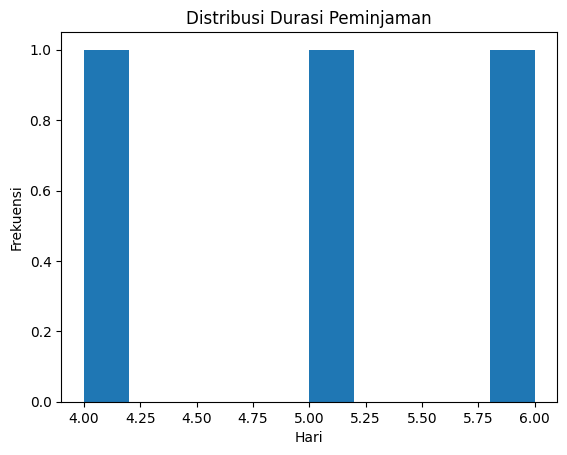

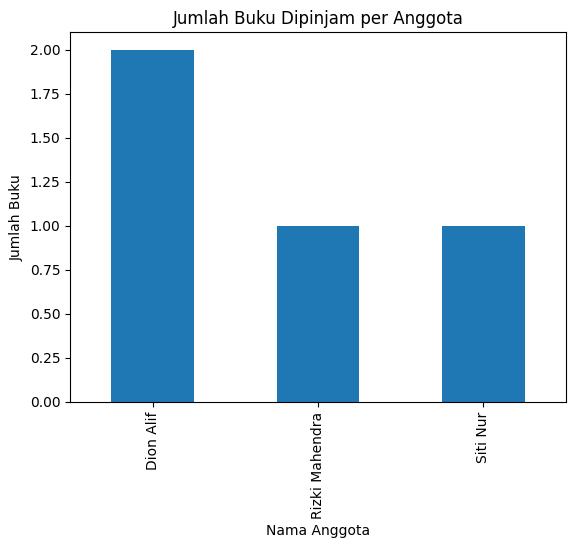

In [11]:
import matplotlib.pyplot as plt

df_peminjaman['durasi_hari'].dropna().plot(kind='hist')
plt.title("Distribusi Durasi Peminjaman")
plt.xlabel("Hari")
plt.ylabel("Frekuensi")
plt.show()

df_group = df_peminjaman.groupby("nama").size()
df_group.plot(kind='bar')
plt.title("Jumlah Buku Dipinjam per Anggota")
plt.xlabel("Nama Anggota")
plt.ylabel("Jumlah Buku")
plt.show()